C:\Users\markr\AppData\Local\Temp\ipykernel_20952\1015751528.py:30: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(bonding_curve, x, dx=1e-6)


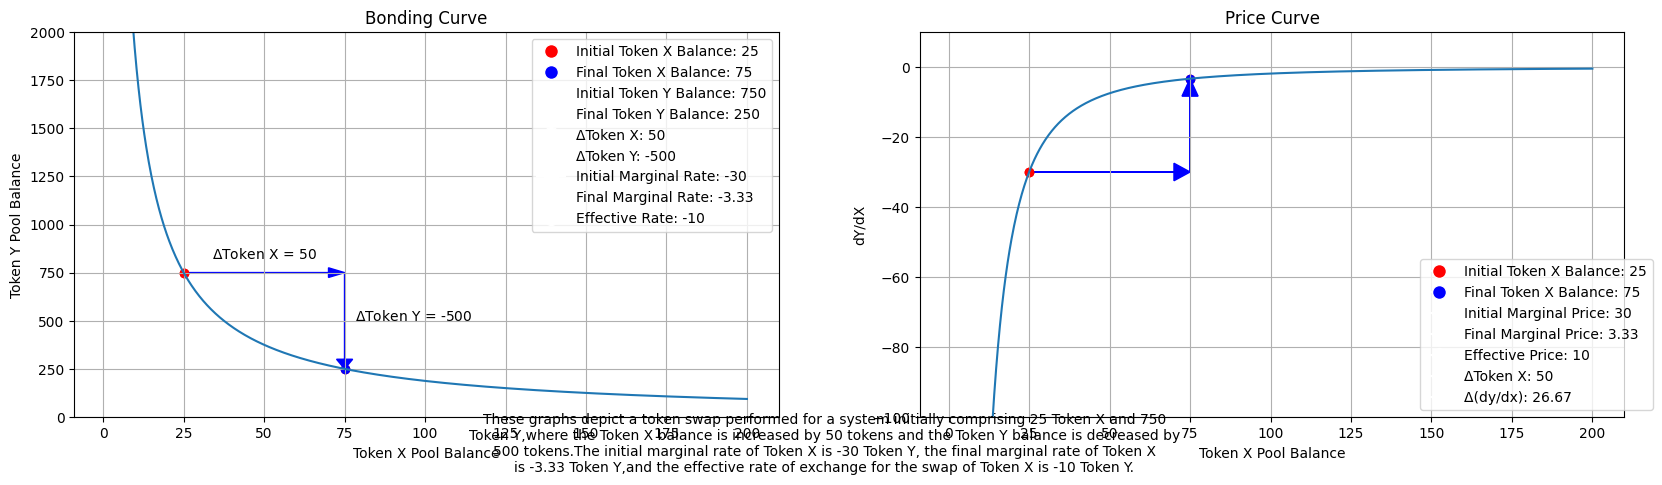

In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import textwrap

# Define the initial token balances
initial_tknx = 25
final_tknx = 75
initial_tkny = 750

# Calculate the invariant k
k = initial_tknx * initial_tkny

# Function to calculate bonding curve using x*y=k
def bonding_curve(x):
    return k / x

# Calculate the change in token balance of tknx
delta_tknx = final_tknx - initial_tknx

# Calculate final token balance of tkny
final_tkny = bonding_curve(final_tknx)

# Calculate the change in token balance of tkny
delta_tkny = final_tkny - initial_tkny
                                                    
# Function to calculate the derivative of the bonding curve
def price_curve(x):
    return derivative(bonding_curve, x, dx=1e-6)

# Initial marginal rate
# Calculate the initial marginal rate of TKNX and TKNY
initial_marginal_rate_tknx = initial_tkny / initial_tknx
initial_marginal_rate_tkny = initial_tknx / initial_tkny

# Final marginal rate
# Calculate the final marginal rate of TKNX and TKNY
final_marginal_rate_tknx = final_tkny / final_tknx
final_marginal_rate_tkny = final_tknx / final_tkny

# Effective rate
# Calculate the effective rate of TKNX and TKNY
effective_rate_tknx = (final_tkny - initial_tkny) / (final_tknx - initial_tknx)
effective_rate_tkny = (final_tknx - initial_tknx) / (final_tkny - initial_tkny)

# Define delta dy/dx
delta_dydx = -1*(final_marginal_rate_tknx - initial_marginal_rate_tknx)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot bonding curve on the left subplot
x = np.linspace(1, 200, 1000)  # Avoid division by zero at x=0
y = bonding_curve(x)
axs[0].plot(x, y)
axs[0].set_xlabel('Token X Pool Balance')
axs[0].set_ylabel('Token Y Pool Balance')
axs[0].set_title('Bonding Curve')
axs[0].grid(True)

# Adjust the scale of the y-axis
axs[0].set_ylim(0, 2000)

# Plot initial and final token balances on the bonding curve
axs[0].scatter([initial_tknx, final_tknx], [bonding_curve(initial_tknx), bonding_curve(final_tknx)], color='red')

# Draw an arrow showing the change in tknx on the bonding curve
axs[0].arrow(initial_tknx, bonding_curve(initial_tknx), delta_tknx, 0, length_includes_head=True, head_width=50, head_length=5, fc='blue', ec='blue')

# Annotate delta tknx on the bonding curve
axs[0].annotate('$\Delta$Token X = {}'.format(delta_tknx), 
                (initial_tknx + delta_tknx/2, bonding_curve(initial_tknx)), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Draw an arrow showing the change in tkny on the bonding curve
axs[0].arrow(final_tknx, bonding_curve(initial_tknx), 0, bonding_curve(final_tknx) - bonding_curve(initial_tknx), length_includes_head=True, head_width=5, head_length=50, fc='blue', ec='blue')

# Annotate delta tkny on the bonding curve
axs[0].annotate('$\Delta$Token Y = {}'.format(round(bonding_curve(final_tknx) - bonding_curve(initial_tknx))), 
                (final_tknx, bonding_curve(initial_tknx) + (bonding_curve(final_tknx) - bonding_curve(initial_tknx))/2), 
                textcoords="offset points", 
                xytext=(50,0), 
                ha='center')

# Plot initial and final token balances
initial_scatter = axs[0].scatter(initial_tknx, bonding_curve(initial_tknx), color='red')
final_scatter = axs[0].scatter(final_tknx, bonding_curve(final_tknx), color='blue')

# Create legend for the bonding curve
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial Token X Balance: {}'.format(initial_tknx), markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Final Token X Balance: {}'.format(final_tknx), markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Initial Token Y Balance: {}'.format(round(bonding_curve(initial_tknx))), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Final Token Y Balance: {}'.format(round(bonding_curve(final_tknx))), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='ΔToken X: {}'.format(delta_tknx), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='ΔToken Y: {}'.format(round(bonding_curve(final_tknx) - bonding_curve(initial_tknx))), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Initial Marginal Rate: {}'.format(-1*round(initial_marginal_rate_tknx)), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Final Marginal Rate: {}'.format(-1*round(final_marginal_rate_tknx, 2)), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Effective Rate: {}'.format(round(effective_rate_tknx)), markerfacecolor='white', markersize=10)]


axs[0].legend(handles=legend_elements, loc='upper right')

# Plot price curve on the right subplot
x = np.linspace(1, 200, 1000)  # Avoid division by zero at x=0
y_prime = price_curve(x)
axs[1].plot(x, y_prime, label='Price Curve')
axs[1].set_xlabel('Token X Pool Balance')
axs[1].set_ylabel('dY/dX')
axs[1].set_title('Price Curve')
axs[1].grid(True)

# Adjust the scale of the y-axis
axs[1].set_ylim(-100, 10)

# Plot initial and final token balances
axs[1].scatter([initial_tknx, final_tknx], [round(price_curve(initial_tknx), 2), round(price_curve(final_tknx), 2)], color='red')

# Draw an arrow showing the change in tknx
axs[1].arrow(initial_tknx, price_curve(initial_tknx), delta_tknx, 0, length_includes_head=True, head_width=5, head_length=5, fc='blue', ec='blue')

# Draw an arrow showing the change in dy/dx
axs[1].arrow(final_tknx, price_curve(initial_tknx), 0, round(price_curve(final_tknx) - price_curve(initial_tknx), 2), length_includes_head=True, head_width=5, head_length=5, fc='blue', ec='blue')

# Plot initial and final token balances
initial_scatter = axs[1].scatter(initial_tknx, round(price_curve(initial_tknx), 2), color='red')
final_scatter = axs[1].scatter(final_tknx, round(price_curve(final_tknx), 2), color='blue')

# Create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial Token X Balance: {}'.format(initial_tknx), markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Final Token X Balance: {}'.format(final_tknx), markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Initial Marginal Price: {}'.format(round(initial_marginal_rate_tknx)), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Final Marginal Price: {}'.format(round(final_marginal_rate_tknx, 2)), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Effective Price: {}'.format(-1*round(effective_rate_tknx)), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='ΔToken X: {}'.format(delta_tknx), markerfacecolor='white', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Δ(dy/dx): {}'.format(round(delta_dydx, 2)), markerfacecolor='white', markersize=10)]

axs[1].legend(handles=legend_elements, bbox_to_anchor=(1.05, 0), loc='lower right')

caption = ("These graphs depict a token swap performed for a system initially comprising {} Token X and {} Token Y," 
"where the Token X balance is {} by {} tokens and the Token Y balance is {} by {} tokens." 
"The initial marginal rate of Token X is {} Token Y, the final marginal rate of Token X is {} Token Y," 
"and the effective rate of exchange for the swap of Token X is {} Token Y."
).format(
    initial_tknx, 
    initial_tkny, 'increased' if delta_tknx > 0 else 'decreased', 
    abs(delta_tknx), 
    'increased' if delta_tkny > 0 else 'decreased', 
    round(abs(delta_tkny)), 
    round(-initial_marginal_rate_tknx), 
    round(-final_marginal_rate_tknx, 2), 
    -1*(round(-effective_rate_tknx)))

# Wrap the text to fit within 80 characters
wrapped_caption = textwrap.fill(caption, 100)

fig.text(0.5, 0.000001, wrapped_caption, ha='center')

plt.show()